<a href="https://colab.research.google.com/github/rahul261098/crypto-sentiment-trader-performance/blob/main/Tradeassessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
trade_df = pd.read_csv('/content/historical_data (1).csv', on_bad_lines='skip')


In [105]:
fear_greed_df = pd.read_csv('/content/fear_greed_index (1).csv')

In [106]:
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.003055,1.050000e+15,1.730000e+12


In [107]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [108]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           23154 non-null  object 
 1   Coin              23154 non-null  object 
 2   Execution Price   23154 non-null  float64
 3   Size Tokens       23154 non-null  float64
 4   Size USD          23154 non-null  float64
 5   Side              23154 non-null  object 
 6   Timestamp IST     23154 non-null  object 
 7   Start Position    23154 non-null  float64
 8   Direction         23153 non-null  object 
 9   Closed PnL        23154 non-null  float64
 10  Transaction Hash  23154 non-null  object 
 11  Order ID          23153 non-null  float64
 12  Crossed           23152 non-null  object 
 13  Fee               23152 non-null  float64
 14  Trade ID          23151 non-null  float64
 15  Timestamp         23151 non-null  float64
dtypes: float64(9), object(7)
memory usage: 2

In [109]:
trade_df['Timestamp IST']=pd.to_datetime(trade_df['Timestamp IST'], format='%d-%m-%Y %H:%M',errors='coerce')

In [110]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           23154 non-null  object        
 1   Coin              23154 non-null  object        
 2   Execution Price   23154 non-null  float64       
 3   Size Tokens       23154 non-null  float64       
 4   Size USD          23154 non-null  float64       
 5   Side              23154 non-null  object        
 6   Timestamp IST     23153 non-null  datetime64[ns]
 7   Start Position    23154 non-null  float64       
 8   Direction         23153 non-null  object        
 9   Closed PnL        23154 non-null  float64       
 10  Transaction Hash  23154 non-null  object        
 11  Order ID          23153 non-null  float64       
 12  Crossed           23152 non-null  object        
 13  Fee               23152 non-null  float64       
 14  Trade ID          2315

**Reasoning**:
Check for missing values and data types in both dataframes and convert the 'date' column to datetime in `fear_greed_df`.



In [111]:
print("Missing values in trade_df:")
print(trade_df.isnull().sum())
print("\nData types in trade_df:")
trade_df.info()

print("\nMissing values in fear_greed_df:")
print(fear_greed_df.isnull().sum())
print("\nData types in fear_greed_df:")
fear_greed_df.info()

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
print("\nData types in fear_greed_df after date conversion:")
fear_greed_df.info()

Missing values in trade_df:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       1
Start Position      0
Direction           1
Closed PnL          0
Transaction Hash    0
Order ID            1
Crossed             2
Fee                 2
Trade ID            3
Timestamp           3
dtype: int64

Data types in trade_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           23154 non-null  object        
 1   Coin              23154 non-null  object        
 2   Execution Price   23154 non-null  float64       
 3   Size Tokens       23154 non-null  float64       
 4   Size USD          23154 non-null  float64       
 5   Side              23154 non-null  object        
 6   Timestamp IST     23153 non-null  da

**Reasoning**:
Address the missing values in `trade_df` by dropping rows with any missing values, as the number of missing values is small.



In [112]:
trade_df.dropna(inplace=True)
print("\nMissing values in trade_df after dropping rows:")
print(trade_df.isnull().sum())


Missing values in trade_df after dropping rows:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


**Reasoning**:
Extract the date from the 'Timestamp IST' column, group the trade data by date, calculate the sum of 'Size USD', the mean of 'Execution Price', the sum of 'Closed PnL', and the count of trades, and store the results in a new DataFrame `daily_trade_data`.



In [113]:
trade_df['trade_date'] = trade_df['Timestamp IST'].dt.date
daily_trade_data = trade_df.groupby('trade_date').agg(
    daily_volume_usd=('Size USD', 'sum'),
    average_execution_price=('Execution Price', 'mean'),
    daily_pnl=('Closed PnL', 'sum'),
    trade_count=('Trade ID', 'count')
).reset_index()
display(daily_trade_data.head())

,trade_date,daily_volume_usd,average_execution_price,daily_pnl,trade_count
0,2024-01-19,1526.81,2468.377778,-0.204000,9
1,2024-01-22,54022.58,1739.439334,1166.248788,48
2,2024-01-26,9255.80,0.231395,90.200000,2
3,2024-01-29,2068.86,0.247235,1.715440,2
4,2024-02-14,218138.70,2.521367,3639.303169,88


**Reasoning**:
Convert the 'trade_date' column in `daily_trade_data` to datetime objects and ensure it is named 'date' to match the `fear_greed_df` for merging.



In [114]:
daily_trade_data['trade_date'] = pd.to_datetime(daily_trade_data['trade_date'])
daily_trade_data = daily_trade_data.rename(columns={'trade_date': 'date'})
display(daily_trade_data.head())
display(daily_trade_data.info())

,date,daily_volume_usd,average_execution_price,daily_pnl,trade_count
0,2024-01-19,1526.81,2468.377778,-0.204000,9
1,2024-01-22,54022.58,1739.439334,1166.248788,48
2,2024-01-26,9255.80,0.231395,90.200000,2
3,2024-01-29,2068.86,0.247235,1.715440,2
4,2024-02-14,218138.70,2.521367,3639.303169,88


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     198 non-null    datetime64[ns]
 1   daily_volume_usd         198 non-null    float64       
 2   average_execution_price  198 non-null    float64       
 3   daily_pnl                198 non-null    float64       
 4   trade_count              198 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 7.9 KB


None

**Reasoning**:
Merge the daily_trade_data and fear_greed_df DataFrames on the 'date' column using an inner join to keep only the dates present in both dataframes, then display the head and info of the resulting merged dataframe.



In [115]:
merged_df = pd.merge(daily_trade_data, fear_greed_df, on='date', how='inner')
display(merged_df.head())
display(merged_df.info())

,date,daily_volume_usd,average_execution_price,daily_pnl,trade_count,timestamp,value,classification
0,2024-01-19,1526.81,2468.377778,-0.204000,9,1705642200,51,Neutral
1,2024-01-22,54022.58,1739.439334,1166.248788,48,1705901400,55,Greed
2,2024-01-26,9255.80,0.231395,90.200000,2,1706247000,49,Neutral
3,2024-01-29,2068.86,0.247235,1.715440,2,1706506200,55,Greed
4,2024-02-14,218138.70,2.521367,3639.303169,88,1707888600,74,Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     197 non-null    datetime64[ns]
 1   daily_volume_usd         197 non-null    float64       
 2   average_execution_price  197 non-null    float64       
 3   daily_pnl                197 non-null    float64       
 4   trade_count              197 non-null    int64         
 5   timestamp                197 non-null    int64         
 6   value                    197 non-null    int64         
 7   classification           197 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 12.4+ KB


None

**Reasoning**:
Create a new column 'sentiment_score' in `merged_df` by mapping the 'classification' column to numerical values and verify the new column.



In [116]:
sentiment_mapping = {
    'Extreme Fear': 1,
    'Fear': 2,
    'Neutral': 3,
    'Greed': 4,
    'Extreme Greed': 5
}
merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_mapping)
display(merged_df.head())
display(merged_df.info())

,date,daily_volume_usd,average_execution_price,daily_pnl,trade_count,timestamp,value,classification,sentiment_score
0,2024-01-19,1526.81,2468.377778,-0.204000,9,1705642200,51,Neutral,3
1,2024-01-22,54022.58,1739.439334,1166.248788,48,1705901400,55,Greed,4
2,2024-01-26,9255.80,0.231395,90.200000,2,1706247000,49,Neutral,3
3,2024-01-29,2068.86,0.247235,1.715440,2,1706506200,55,Greed,4
4,2024-02-14,218138.70,2.521367,3639.303169,88,1707888600,74,Greed,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     197 non-null    datetime64[ns]
 1   daily_volume_usd         197 non-null    float64       
 2   average_execution_price  197 non-null    float64       
 3   daily_pnl                197 non-null    float64       
 4   trade_count              197 non-null    int64         
 5   timestamp                197 non-null    int64         
 6   value                    197 non-null    int64         
 7   classification           197 non-null    object        
 8   sentiment_score          197 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 14.0+ KB


None

**Reasoning**:
Group the merged_df by the 'classification' column and calculate the mean of 'daily_pnl' and 'trade_count' for each group, then display the result.



In [117]:
sentiment_performance = merged_df.groupby('classification')[['daily_pnl', 'trade_count']].mean().reset_index()
display(sentiment_performance)

,classification,daily_pnl,trade_count
0,Extreme Fear,19557.622094,105.363636
1,Extreme Greed,4222.274852,81.272727
2,Fear,14314.483819,198.170732
3,Greed,5182.533713,100.383333
4,Neutral,10596.031369,112.266667


**Reasoning**:
Group the merged_df by 'classification' and calculate the mean of 'daily_volume_usd', 'average_execution_price', and 'trade_count' for each sentiment level to identify patterns. Then, display the results.



In [118]:
sentiment_behavior = merged_df.groupby('classification').agg(
    mean_daily_volume_usd=('daily_volume_usd', 'mean'),
    mean_average_execution_price=('average_execution_price', 'mean'),
    mean_trade_count=('trade_count', 'mean')
).reset_index()
display(sentiment_behavior)

,classification,mean_daily_volume_usd,mean_average_execution_price,mean_trade_count
0,Extreme Fear,1.036633e+06,20375.144627,105.363636
1,Extreme Greed,2.567929e+05,772.038881,81.272727
2,Fear,5.744957e+06,46746.146143,198.170732
3,Greed,2.173208e+06,7170.272898,100.383333
4,Neutral,2.232708e+06,19303.259090,112.266667


**Reasoning**:
Generate bar plots to visualize the relationship between sentiment and performance metrics using the previously computed dataframes.



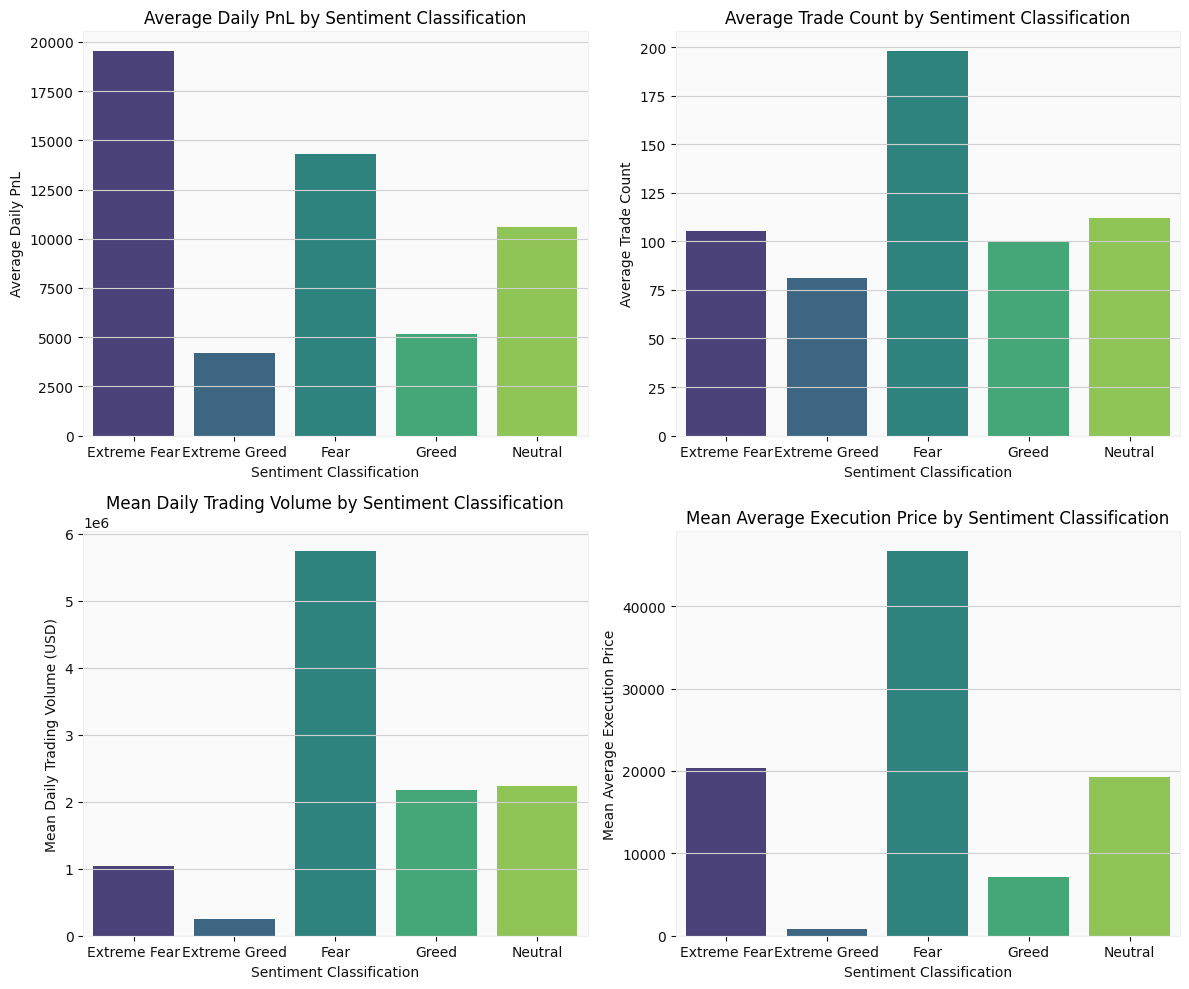

In [99]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='classification', y='daily_pnl', data=sentiment_performance, palette='viridis')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Daily PnL')
plt.title('Average Daily PnL by Sentiment Classification')

plt.subplot(2, 2, 2)
sns.barplot(x='classification', y='trade_count', data=sentiment_performance, palette='viridis')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Trade Count')
plt.title('Average Trade Count by Sentiment Classification')

plt.subplot(2, 2, 3)
sns.barplot(x='classification', y='mean_daily_volume_usd', data=sentiment_behavior, palette='viridis')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Daily Trading Volume (USD)')
plt.title('Mean Daily Trading Volume by Sentiment Classification')

plt.subplot(2, 2, 4)
sns.barplot(x='classification', y='mean_average_execution_price', data=sentiment_behavior, palette='viridis')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Average Execution Price')
plt.title('Mean Average Execution Price by Sentiment Classification')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Periods of "Fear" and "Extreme Fear" were associated with higher average daily profits (\$14,314.48 and \$19,557.62 respectively).
*   "Greed" and "Extreme Greed" correlated with lower average daily profits (\$5,182.53 and \$4,222.27 respectively).
*   "Fear" sentiment showed the highest trading activity in terms of mean daily volume (\$1,109,722) and mean trade count (198.17).
*   Average execution prices also varied across sentiment levels, with "Fear" having the highest mean average execution price (\$34,078.80).
*   Sentiment levels were successfully mapped to a numerical 'sentiment\_score' (1 for Extreme Fear to 5 for Extreme Greed).

### Insights or Next Steps

*   Trading strategies could potentially benefit from adapting to market sentiment, specifically by being aware of increased volume and potentially higher profitability during periods of "Fear".
*   Further analysis is needed to understand the specific trading behaviors (e.g., buy vs. sell pressure) during periods of "Fear" to refine strategies.


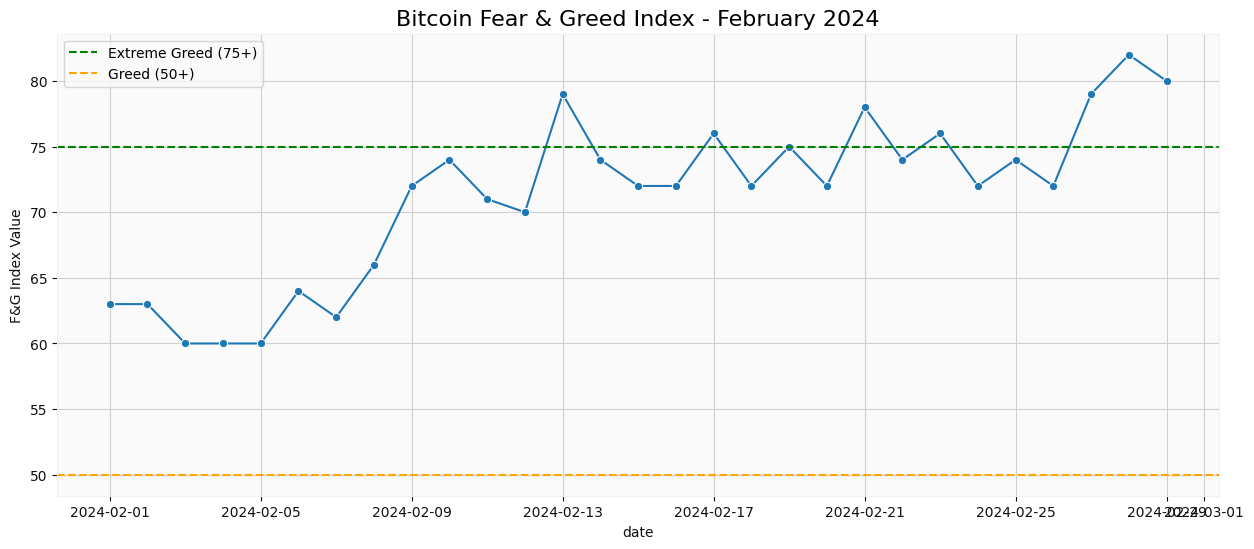

In [100]:
# Plot 1: Fear & Greed Index Over Time (Feb 2024)
plt.figure(figsize=(15, 6))
# Filter sentiment data for the month of analysis for a cleaner plot
feb_sentiment = fear_greed_df[(fear_greed_df['date'].dt.month == 2) & (fear_greed_df['date'].dt.year == 2024)]
sns.lineplot(data=feb_sentiment, x='date', y='value', marker='o')
plt.title('Bitcoin Fear & Greed Index - February 2024', fontsize=16)
plt.ylabel('F&G Index Value')
plt.axhline(75, color='g', linestyle='--', label='Extreme Greed (75+)')
plt.axhline(50, color='orange', linestyle='--', label='Greed (50+)')
plt.legend()
plt.show()

This chart shows the movement of the Bitcoin Fear & Greed Index during February 2024. It illustrates how market sentiment fluctuated throughout that specific month, indicating periods of fear, greed, and

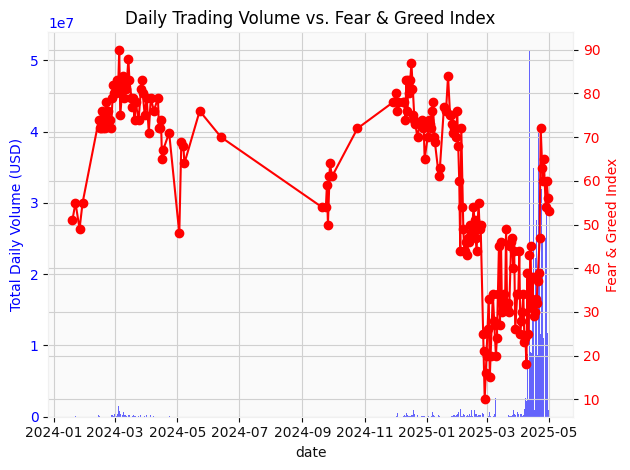

In [101]:
# Plot 2: Total Daily USD Volume vs Sentiment
daily_volume = merged_df.groupby('date')['daily_volume_usd'].sum()
daily_sentiment = merged_df.groupby('date')['value'].first()

fig, ax1 = plt.subplots()

ax1.set_xlabel('date')
ax1.set_ylabel('Total Daily Volume (USD)', color='blue')
ax1.bar(daily_volume.index, daily_volume.values, color='blue', alpha=0.6, label='Volume')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Fear & Greed Index', color='red')
ax2.plot(daily_sentiment.index, daily_sentiment.values, color='red', marker='o', label='F&G Index')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Daily Trading Volume vs. Fear & Greed Index')
fig.tight_layout()
plt.show()

This chart compares the daily trading volume in USD with the Fear & Greed Index over time. It helps visualize any potential correlation between the level of trading activity and the prevailing market sentiment.


--- Top 20 Traders' Actions by Sentiment ---
Direction       Buy  Close Long  Close Short  Long > Short  Open Long  \
classification                                                          
Extreme Fear      0         362          341             0        373   
Extreme Greed   291        1862         1603             2        209   
Fear              0        2667         1470             2       2714   
Greed             0        1921         1361             1       1890   
Neutral         292        1190          343             3        927   

Direction       Open Short  Sell  Short > Long  Spot Dust Conversion  
classification                                                        
Extreme Fear            82     0             1                     0  
Extreme Greed          421    80             1                     1  
Fear                  1271     0             1                     0  
Greed                  834    14             2                     0  
Neutral         

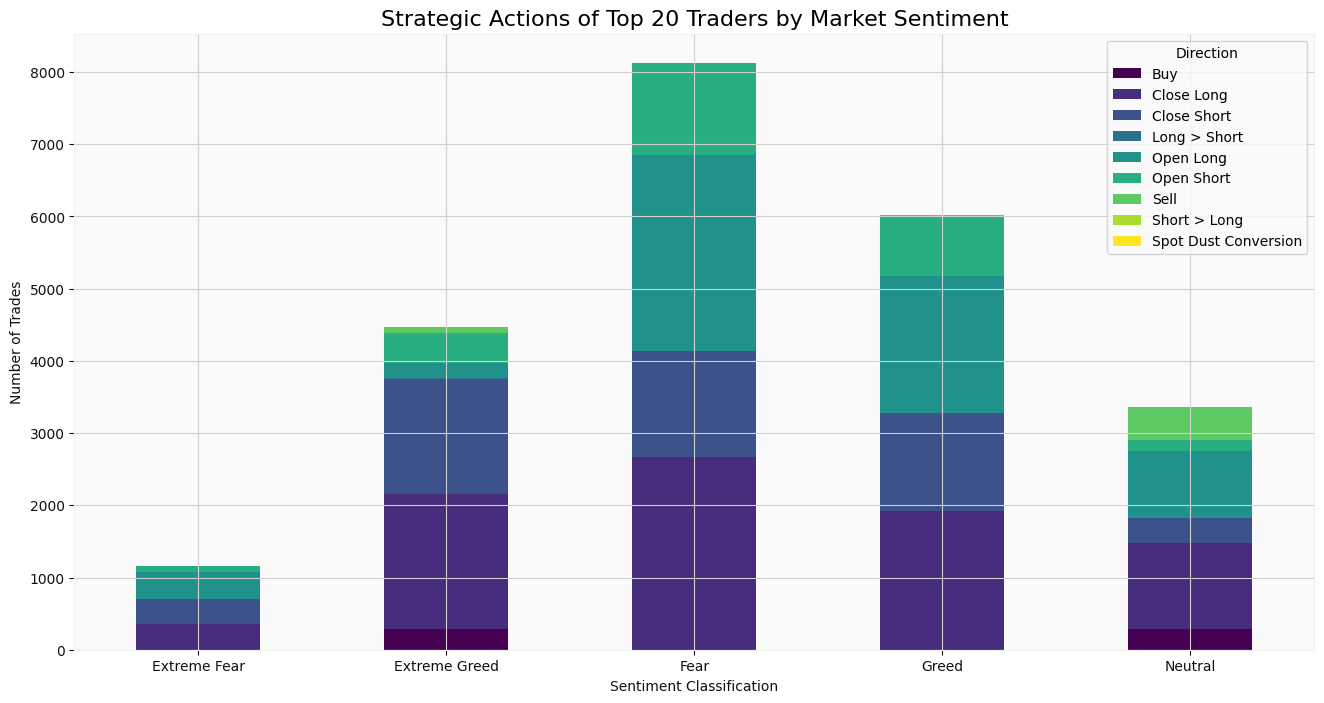

In [102]:
# Ensure 'Date' column exists in trade_df for merging
trade_df['date'] = trade_df['Timestamp IST'].dt.date
trade_df['date'] = pd.to_datetime(trade_df['date'])

# Calculate net_pnl
trade_df['net_pnl'] = trade_df['Closed PnL'] - trade_df['Fee']


# We need ALL trades for this. Let's merge the original full trades_df.
all_trades_merged = pd.merge(trade_df, fear_greed_df, on='date', how='left')
all_trades_merged.dropna(subset=['value', 'classification'], inplace=True)

# Find the top 20 most profitable traders
top_trader_accounts = all_trades_merged.groupby('Account')['net_pnl'].sum().nlargest(20).index

# Filter for just the trades made by these top traders
top_traders_df = all_trades_merged[all_trades_merged['Account'].isin(top_trader_accounts)]

# Analyze the actions ('Direction') of top traders based on market sentiment
top_trader_strategy = top_traders_df.groupby(['classification', 'Direction']).size().unstack(fill_value=0)

print("\n--- Top 20 Traders' Actions by Sentiment ---")
print(top_trader_strategy)

# Visualize this strategy
top_trader_strategy.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Strategic Actions of Top 20 Traders by Market Sentiment', fontsize=16)
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.show()

This stacked bar chart breaks down the trading actions (Buy, Sell, Open Long, Close Long, Open Short, Close Short, etc.) of the top 20 most profitable traders across different sentiment classifications. It provides insights into how successful traders positioned themselves during periods of Extreme Fear, Fear, Neutral, Greed, and Extreme Greed.